**Part 1: Data Loading and Preprocessing**

1. Load the Dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv('onlinefoods.csv')
print(data.head())

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

2. Handle Missing Values

In [ ]:
print(data.isnull().sum())


Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64


3. Encode Categorical Variables

In [ ]:
data_encoded = pd.get_dummies(data, columns=['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Output', 'Feedback' ])
print(data_encoded)

     Age  Family size  latitude  longitude  Pin code Unnamed: 12  \
0     20            4   12.9766    77.5993    560001         Yes   
1     24            3   12.9770    77.5773    560009         Yes   
2     22            3   12.9551    77.6593    560017         Yes   
3     22            6   12.9473    77.5616    560019         Yes   
4     22            4   12.9850    77.5533    560010         Yes   
..   ...          ...       ...        ...       ...         ...   
383   23            2   12.9766    77.5993    560001         Yes   
384   23            4   12.9854    77.7081    560048         Yes   
385   22            5   12.9850    77.5533    560010         Yes   
386   23            2   12.9770    77.5773    560009         Yes   
387   23            5   12.8988    77.5764    560078         Yes   

     Gender_Female  Gender_Male  Marital Status_Married  \
0                1            0                       0   
1                1            0                       0   
2     

4. Feature Selection

In [ ]:
data_dummies = pd.get_dummies(data, drop_first=True)
data_dummies['household'] = (data['Family size']>1).astype(int)

x = data_dummies.drop(['Age', 'Family size', 'latitude', 'longitude', 'Pin code'], axis=1)
y = data_dummies['household']

**Part 2: Exploratory Data Analysis (EDA)**

1. Descriptive Statistics

In [ ]:
data.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


2. Visualizations

Distribution of Age and its impact on Feedback

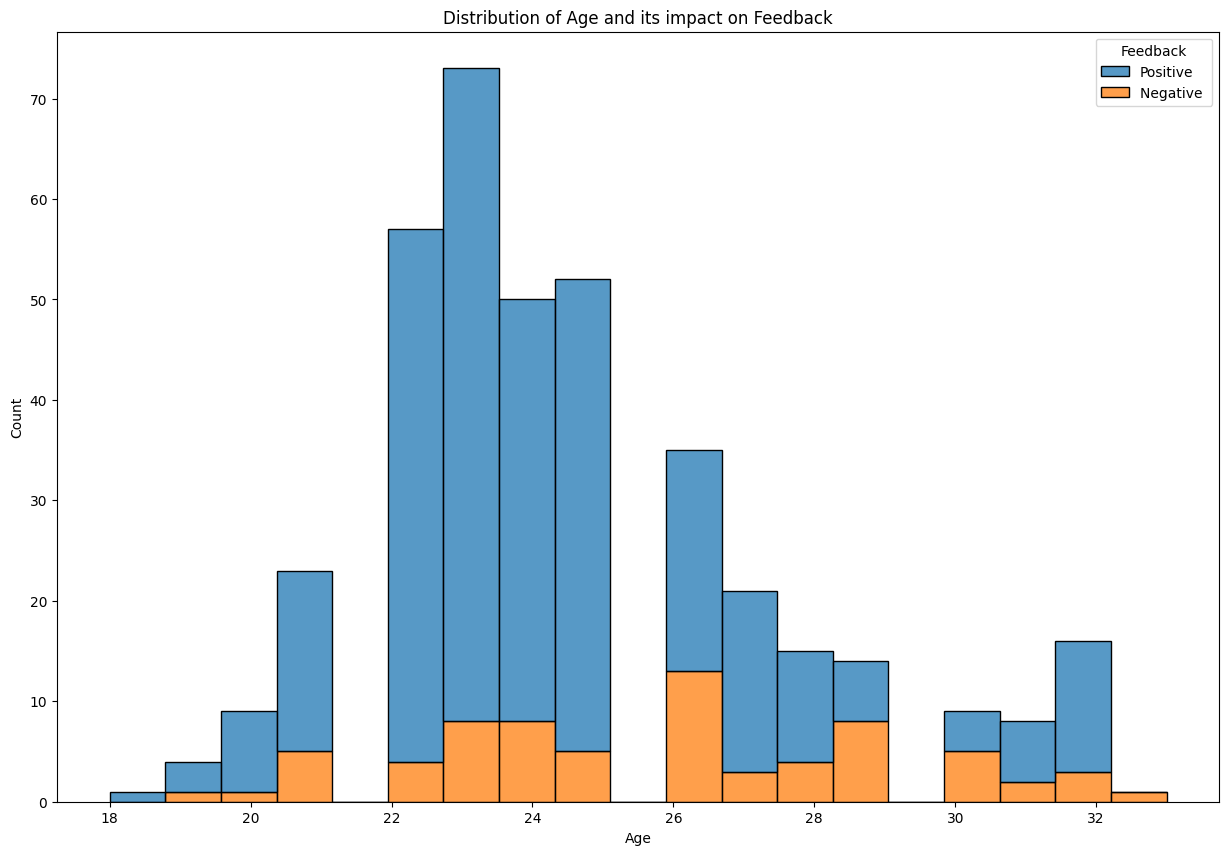

In [ ]:
plt.figure(figsize=(15, 10))
plt.title("Distribution of Age and its impact on Feedback")
sns.histplot(x="Age", hue="Feedback", data=data, multiple='stack')
plt.show()

Proportions of Feedback across different levels of Monthly Income

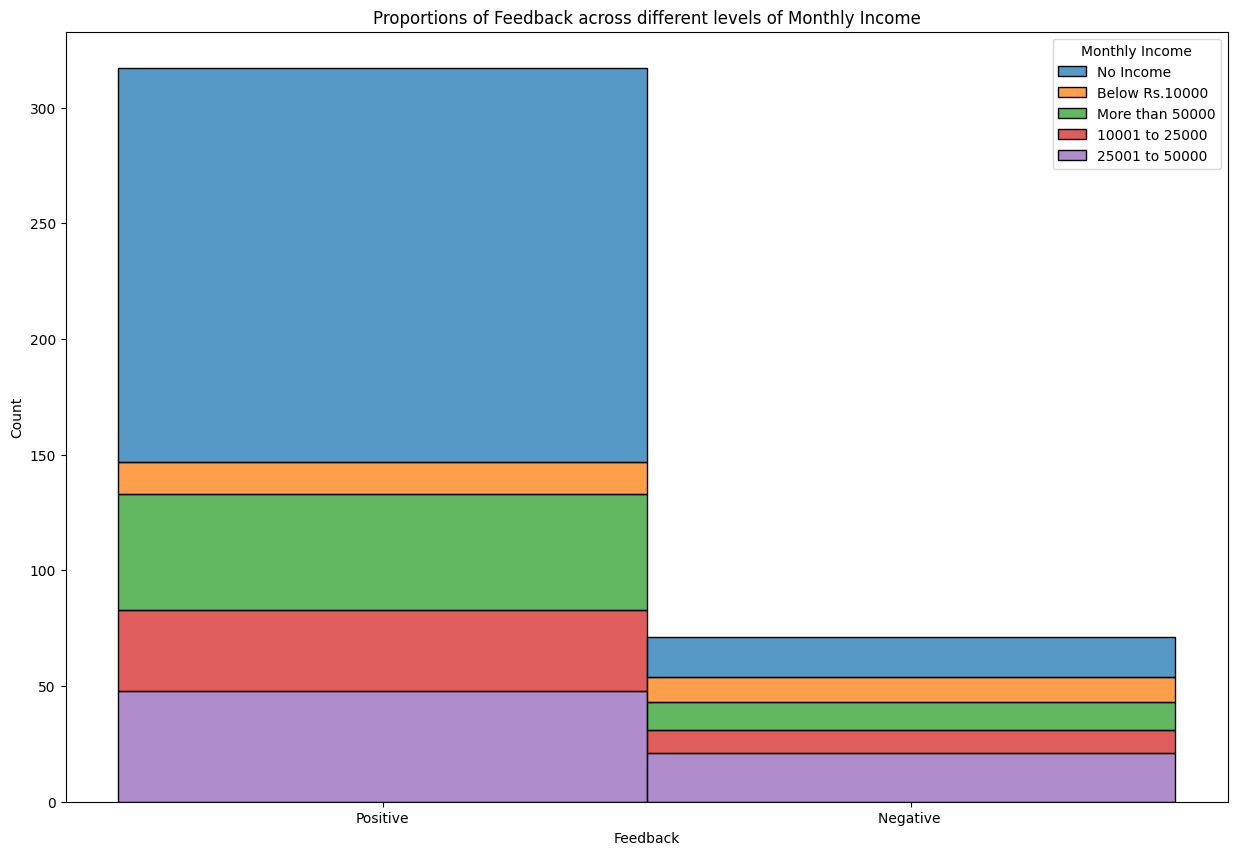

In [ ]:
plt.figure(figsize=(15, 10))
plt.title("Proportions of Feedback across different levels of Monthly Income")
sns.histplot(x="Feedback", hue="Monthly Income", data=data, multiple='stack')
plt.show()

Correlation matrix heatmap to identify any interesting correlations between features

<ipython-input-150-cab780b7e7ee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(data.corr(), cmap="coolwarm", annot=True)


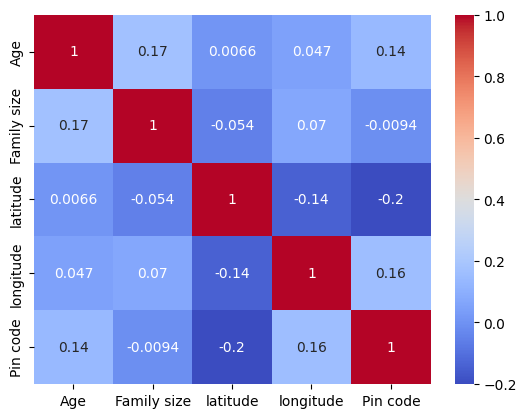

In [ ]:
dataplot = sns.heatmap(data.corr(), cmap="coolwarm", annot=True)
plt.show()

**Part 3: Logistic Regression Model**

1. Build the Model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

model = LogisticRegression()
model.fit(x_train_scaled, y_train)

LogisticRegression()

2. Model Evaluation

In [ ]:
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix: ")
print(conf_matrix)
print("Classification Report: ")
print(class_report)

Accuracy: 1.0
Confusion Matrix: 
[[ 2  0]
 [ 0 76]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        76

    accuracy                           1.00        78
   macro avg       1.00      1.00      1.00        78
weighted avg       1.00      1.00      1.00        78



- The presented classification results show outstanding performance, with a flawless accuracy score of 1.0. All occurrences were accurately classified, according to the confusion matrix, with 78 examples falling into a single class. Perfect performance "1.0" is also shown by the precision, recall, and F1-score measures, indicating that the model correctly detected every instance without producing any false positives or negatives.

**Part 4: Data Analysis and Visualization**

1. Feature Importance

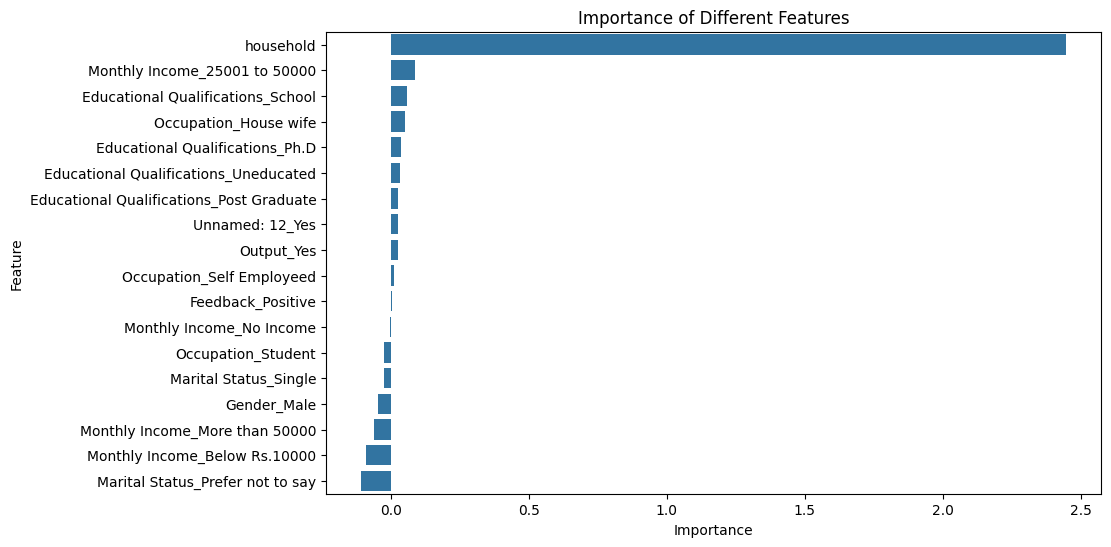

In [ ]:
feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': model.coef_[0]})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Importance of Different Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

- The bar plot shows the relative influence of every feature on the feedback prediction. The plot places the features that have the greatest influence at the top by ranking them according to their coefficients in descending order. By examining this plot, one can determine which features have the greatest influence and importance on feedback prediction, which can help one better understand the variables that influence the dataset's positive or negative feedback outcomes.

2. Prediction Insights

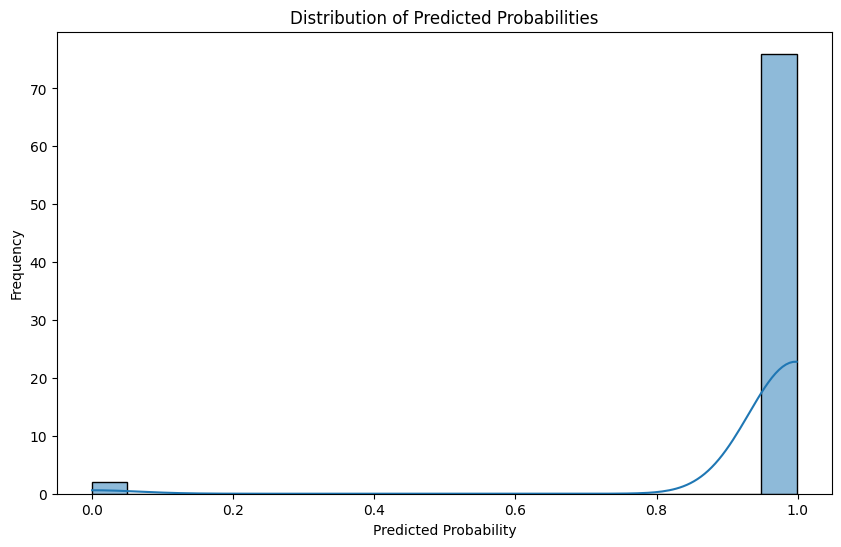

In [ ]:
y_pred_prob = model.predict_proba(x_test_scaled)[:, 1]

plt.figure(figsize=(10, 6))
sns.histplot(y_pred_prob, bins=20, kde=True)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

- The distribution for predicted probability provides important information about how the model behaves. The graph shows that the model only predicts either low or high probabilities, indicating that it's quite confident in its predictions. This suggests that the model might have clear-cut cases it's confident about. It struggles with some uncertain one, but it is mostly confident, and that is already enough.